In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.datasets import fetch_california_housing

In [4]:
# LOAD DATASET
data = fetch_california_housing()
x = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  

In [5]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [6]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [7]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [8]:
# SPLIT INTO TRAINING AND TESTING DATA
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
# DEFINE A BASE DECISION TREE
base_learner=DecisionTreeRegressor()
base_learner

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [10]:
# DEFINE HYPERPARAMER GRID
param_grid={
            'n_estimators':[50,100,200],'learning_rate':[0.01,0.1,0.5,1.0],'base_estimator__max_depth':[1,3,5]
           }

In [15]:
# CREATE ADABOOST REGRESSOR
ada_regressor=AdaBoostRegressor(base_estimator=base_learner,random_state=42)

In [13]:
# PERFORM GRID SEARCH
grid_search=GridSearchCV(ada_regressor,param_grid,cv=5,scoring='r2',n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                              criterion='mse',
                                                                              max_depth=None,
                                                                              max_features=None,
                                                                              max_leaf_nodes=None,
                                                                              min_impurity_decrease=0.0,
                                                                              min_impurity_split=None,
                                                                              min_samples_leaf=1,
                                                                              min_samples_split=2,
                                                                              min

In [14]:
# BEST PARAMETERS
print("Best Parameters:",grid_search.best_params_)

Best Parameters: {'base_estimator__max_depth': 5, 'learning_rate': 0.1, 'n_estimators': 100}


In [19]:
# TRAIN WITH BEST PARAMETERS
best_model=grid_search.best_estimator_
y_pred=best_model.predict(x_test)

In [20]:
# EVALUATE METRICS
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mae)
print(mse)
print(r2)

0.5104922814102567
0.4302811026440735
0.6716436549284901


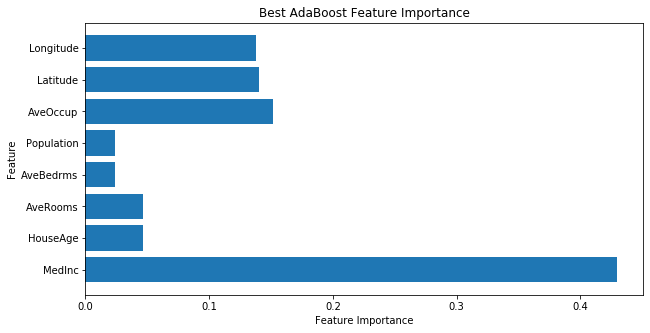

In [22]:
# PLOT FEATURE IMPORTANCE
importances = best_model.feature_importances_
plt.figure(figsize=(10, 5))
plt.barh(x.columns, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Best AdaBoost Feature Importance')
plt.show()